In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.utils import shuffle

In [51]:
def y2indicator(Y,K):
    N = len(Y)
    
    ind = np.zeros((N,K))
    for i in range(N):
        ind[i,Y[i]] = 1
        
    return ind

In [52]:
def get_data():
    df = pd.read_csv('ecommerce_data.csv')
    data = df.as_matrix()

    X = data[:, :-1]
    Y = data[:, -1]

    X[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
    X[:, 2] = (X[:, 2] - X[:, 2].mean()) / X[:, 2].std()

    N, D = X.shape
    X2 = np.zeros((N, D + 3))
    X2[:, :(D - 1)] = X[:, :(D - 1)]

    for n in range(N):
        t = int(X[n, D - 1])
        X2[n, (t + D - 1)] = 1

    return X2, Y

In [53]:
def softmax(a):
    expA = np.exp(a)
    return expA/expA.sum(axis=1,keepdims=True)

In [75]:
X,Y = get_data()
X,Y = shuffle(X,Y)

Y = Y.astype(int)

D = X.shape[1]
M = 5
K = len(set(Y))

X_train = X[:-100]
Y_train = Y[:-100]
Y_train_ind = y2indicator(Y_train,K)

X_test = X[-100:]
Y_test = Y[-100:]
Y_test_ind = y2indicator(Y_test,K)

C:\anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [64]:
W1 = np.random.rand(D,M)
b1 = np.zeros(M)
W2 = np.random.rand(M,K)
b2 = np.zeros(K)



In [65]:
def forward(X,W1,b1,W2,b2):
    Z = np.tanh(X.dot(W1) + b1)
    return softmax(Z.dot(W2) + b2) , Z

In [66]:
def predict(P_Y_given_X):
    return np.argmax(P_Y_given_X,axis=1)

In [67]:
def classification_rate(Y,P):
    return np.mean(Y == P)

In [68]:
def cross_entropy(T,pY):
    return -np.mean(T*np.log(pY))

In [69]:
train_cost = []
test_cost = []

learning_rate = 0.001

In [79]:
for i in range(100000):
    pY_train , Z_train = forward(X_train,W1,b1,W2,b2)
    pY_test , Z_test = forward(X_test, W1, b1, W2, b2)
    
    c_train = cross_entropy(Y_train_ind,pY_train)
    c_test = cross_entropy(Y_test_ind, pY_test)
    
    train_cost.append(c_train)
    test_cost.append(c_test)
    
    W2 -= learning_rate*(Z_train.T.dot(pY_train - Y_train_ind))
    b2 -= (learning_rate*(pY_train - Y_train_ind)).sum()
    
    dZ = ((pY_train - Y_train_ind).dot(W2.T)) * (1 - Z_train*Z_train)
    
    W1 -= learning_rate*(X_train.T.dot(dZ))
    b1 -= (learning_rate*dZ).sum(axis=0)
    
    if i % 1000 == 0:
            print(i, c_train, c_test)

0 0.006353343357934618 0.029790036671545197
1000 0.006136079550222393 0.030175686071692617
2000 0.0059369787423708895 0.030602708324365145
3000 0.0057537528528867465 0.031068945779409152
4000 0.005585019186219554 0.03157373367074197
5000 0.0054295158706851076 0.03211004966019684
6000 0.005285877541456937 0.03266532347251653
7000 0.00515276849015402 0.033227951947955546
8000 0.005028989338000884 0.033790316903835466
9000 0.004913496211987144 0.03434818551927213
10000 0.004805387487056896 0.034899378302441136
11000 0.004703885145405237 0.03544283221801448
12000 0.004608316943325937 0.03597808220551166
13000 0.0045181004644888716 0.036504990592958
14000 0.004432729284000687 0.03702360403538848
15000 0.00435176122381864 0.03753407456523822
16000 0.00427480852908274 0.038036613708175036
17000 0.004201529716105569 0.03853146448505617
18000 0.004131622824627404 0.03901888365624879
19000 0.004064819825319472 0.03949913017515992
20000 0.004000881967715883 0.03997245759100008
21000 0.00393959589

In [80]:
print ("Final train classification rate : " + str(classification_rate(Y_train , predict(pY_train))))
print ("Final test classification rate : " + str(classification_rate(Y_test ,predict(pY_test))))

Final train classification rate : 1.0
Final test classification rate : 0.97


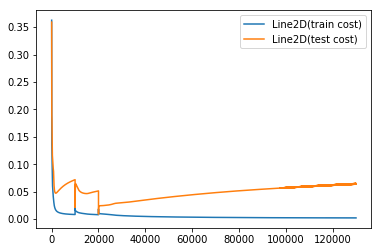

In [81]:
legend1, = plt.plot(train_cost, label = 'train cost')
legend2, = plt.plot(test_cost, label = 'test cost')

plt.legend([legend1,legend2])
plt.show()